 # Bobina de Helmontz
 Experimento da Disciplina de Laboratório de Física II
 Vinícius dos Passos de Souza
 Lucas de Heck

In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel('Bobina-Helmontz.xlsx',sheet_name='Dados')

#a=R (Helmontz)
z1 = data['z1(cm)'].values
ez1=data['ez1(cm)'].values
B1= data['B1(mT)'].values
eB1=data['eB1(mT)'].values
#ANTI  HELMONTZ
z2 = data['z2(cm)'].values
ez2=data['ez2(cm)'].values
B2= data['B2(mT)'].values
eB2=data['eB2(mT)'].values

#r = 3 cm
z11 = data['z11(cm)'].values
ez11=data['ez11(cm)'].values
B11= data['B11(mT)'].values
eB11=data['eB11(mT)'].values
#r = 8 cm
z12 = data['z12(cm)'].values
ez12=data['ez12(cm)'].values
B12= data['B12(mT)'].values
eB12=data['eB12(mT)'].values
#r = 8 cm (ANTI HELMONTZ)
z13 = data['z13(cm)'].values
ez13=data['ez13(cm)'].values
B13= data['B13(mT)'].values
eB13=data['eB13(mT)'].values

#r = 15 cm (COMPONENTE BR)
z21 = data['z21(cm)'].values
ez21=data['ez21(cm)'].values
B21= data['B21(mT)'].values
eB21=data['eB21(mT)'].values
#r = 15 cm (COMPONENTE BR) ANTI HELMONTZ
z22 = data['z22(cm)'].values
ez22=data['ez22(cm)'].values
B22= data['B22(mT)'].values
eB22=data['eB22(mT)'].values


Importados os dados, posso agora plota-los

# Componente em Z do Campo Mangético

É esperado ao se ter uma espira circular(no plano $xy$) a uma distância l no eixo $z$, posso calcular o Campo Magnético usando Lei de Biot-Savart

$\vec{B} = \frac{\mu_0 IN }{4\pi} \int \frac{d\vec{l}X(\vec{r}-\vec{R})}{|\vec{r}-\vec{R}|^3}$,

definindo $\vec{R} = R( \cos \phi \hat{x}+\sin \phi \hat{y})$ , $\vec{r} = l\hat{z}$ e $d\vec{l} = R(-\sin \phi \hat{x}+ \cos \phi \hat{y})d \phi$, assim, terei


$\vec{B} = \frac{\mu_0 I}{4\pi} \hat{z}\int_{0}^{2\pi} \frac{R^2}{(R^2+l^2)^{3/2}} d\phi$, 


$\vec{B} = \frac{\mu_0 IN }{2R}\frac{\hat{z}}{\left (1+\left ( \frac{l}{R}\right )^2 \right )^{3/2}}.$

Sabendo como o campo magnético deve ser, posso saber o que esperar quando tiver duas espiras, cada uma gerando um campo desses e as duas à mesma distância $l$ em modulo no eixo $z$.

$\vec{B_z} = \vec{B_1}+\vec{B_2}$

$\vec{B_z} = \frac{\mu_0 I }{2R} \hat{z} \left [  \frac{1}{ \left (1+\left ( \frac{l_1}{R}\right)^2 \right )^{3/2}}+\frac{1}{\left (\left (1+ \frac{l_2}{R}\right)^2\right )^{3/2}}\right ]. $


Se tiver $N$ espiras dessa de cada lado, espero 

$\boxed{\vec{B_z} = \frac{\mu_0 IN }{2R} \hat{z} \left [  \frac{1}{ \left (1+\left ( \frac{z}{R}\right)^2 \right )^{3/2}}+\frac{1}{\left (  1+ \left ( \frac{z-a}{R}\right)^2\right )^{3/2}}\right ]}. $


Com esse conceito posso fazer um gráfico do que espero

In [2]:
import numpy as np
def Bz(l,R,u0,I,N):
    return u0*I*N/(2*R*(1+(l/R)**2)**(3/2))
#DEFININDO PARAMETROS DA BOBINA
I = 2.5 #AMPERE
N = 150 #NUMERO DE VOLTAS
u0=4*np.pi*10**(-7) #PERMISSIVIDADE NO VÁCUO
R = 0.1985 #RAIO BOBINA (m)


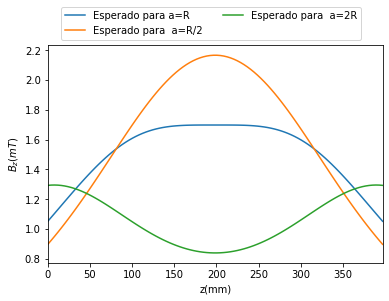

In [3]:
from matplotlib import pyplot as plt
    #Para todos os casos l_1=-x+a/2
#l_1+l_2 = a -> l_2 = a-l_1 -> l_2 = x +a/2

#Caso em que a = R,
x = np.linspace(-R,R,100)
plt.plot((x+R)*1000,Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label='Esperado para a=R')
#Caso em que a = R/2
x = np.linspace (-R,R,100)
plt.plot((x+R)*1000,Bz(x+R/4,R,u0,I,N)*1000+Bz(R/4-x,R,u0,I,N)*1000,'-',label='Esperado para  a=R/2')

#Caso em que a = R*2
x = np.linspace (-R,R,100)
plt.plot((x+R)*1000,Bz(x+R,R,u0,I,N)*1000+Bz(R-x,R,u0,I,N)*1000,'-',label='Esperado para  a=2R')

plt.legend(bbox_to_anchor =(0.950, 1.20), ncol = 2)
plt.xlim([0,2*R*1000])
#plt.ylim([0.4,2])
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('expectBZXz.png')


Sabendo o que se espera, agora podemos plotar o que obitvemos

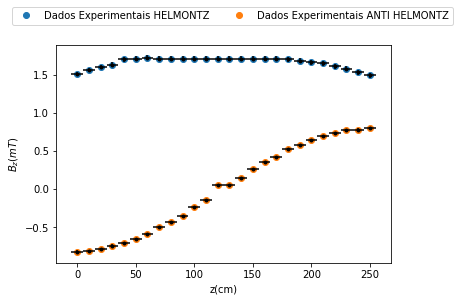

In [4]:
from matplotlib import pyplot as plt

plt.plot(z1*10,B1,'o',label='Dados Experimentais HELMONTZ')
plt.errorbar(z1*10,B1,yerr=eB1,xerr=ez1*10,fmt='.k')
plt.plot(z2*10,B2,'o',label='Dados Experimentais ANTI HELMONTZ')
plt.errorbar(z2*10,B2,yerr=eB2,xerr=ez2*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.2, 1.20), ncol = 2)
plt.xlabel('z(cm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('graphBZXz.png')

Posso comparar as curvas e ver se em fato os nossos dados estão longe das curvas

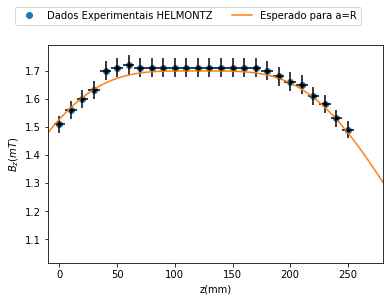

In [5]:
#dados experimentais
plt.plot(z1*10,B1,'o',label='Dados Experimentais HELMONTZ')
plt.errorbar(z1*10,B1,yerr=eB1,xerr=ez1*10,fmt='.k')
#expected em a = R,
x = np.linspace(-R,R,100)
plt.plot((x)*1000+120,Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label='Esperado para a=R')


plt.legend(bbox_to_anchor =(0.950, 1.20), ncol = 2)
plt.xlim([-10,280])
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('CompararBz1Xz1.png')

# Anti Helmontz

Para esse caso, teremos

$\boxed{\vec{B_z} = \frac{\mu_0 IN }{2R} \hat{z} \left [  \frac{1}{ \left (1+\left ( \frac{z}{R}\right)^2 \right )^{3/2}}-\frac{1}{\left (  1+ \left ( \frac{z-a}{R}\right)^2\right )^{3/2}}\right ]}. $


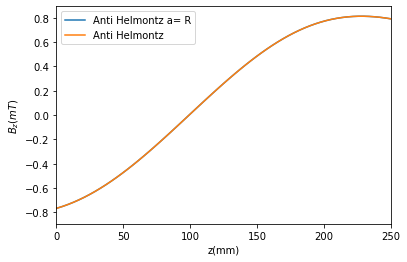

In [6]:
#Para todos os casos l_1=-x+a/2
#l_1+l_2 = a -> l_2 = a-l_1 -> l_2 = x +a/2

#Caso anti Helmontz
x = np.linspace(-R,R,100)
plt.plot((x+R/2)*1000,-Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label='Anti Helmontz a= R')
#Caso anti Helmontz
x = np.linspace(-R,R,100)
plt.plot((x+R/2)*1000,-Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label='Anti Helmontz')

plt.legend()
plt.xlim([0,250])
#plt.ylim([0.4,2])
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('expectANtiBZXz.png')

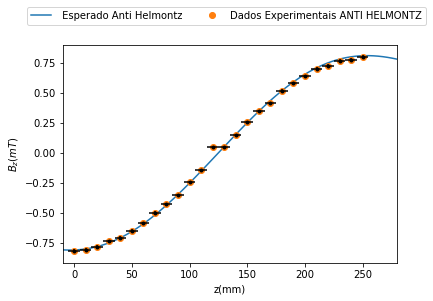

In [7]:
#esperado
x = np.linspace(-R,R,100)
plt.plot((x)*1000+125,-Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label=' Esperado Anti Helmontz')

#dados
plt.plot(z2*10,B2,'o',label='Dados Experimentais ANTI HELMONTZ')
plt.errorbar(z2*10,B2,yerr=eB2,xerr=ez2*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.1, 1.20), ncol = 2)
plt.xlim([-10,280])
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('CompararBz1Xz1.png')

Agora os 2 juntos

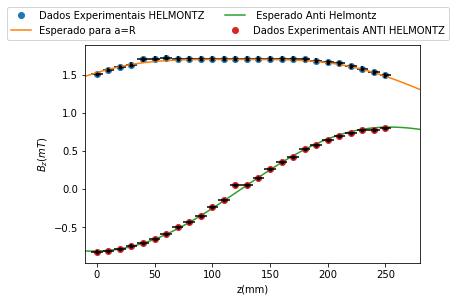

In [8]:
#dados experimentais
plt.plot(z1*10,B1,'o',label='Dados Experimentais HELMONTZ')
plt.errorbar(z1*10,B1,yerr=eB1,xerr=ez1*10,fmt='.k')
#expected em a = R,
x = np.linspace(-R,R,100)
plt.plot((x)*1000+120,Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label='Esperado para a=R')


#esperado
x = np.linspace(-R,R,100)
plt.plot((x)*1000+125,-Bz(x+R/2,R,u0,I,N)*1000+Bz(R/2-x,R,u0,I,N)*1000,'-',label=' Esperado Anti Helmontz')

#dados
plt.plot(z2*10,B2,'o',label='Dados Experimentais ANTI HELMONTZ')
plt.errorbar(z2*10,B2,yerr=eB2,xerr=ez2*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.1, 1.20), ncol = 2)
plt.xlim([-10,280])
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('CompararBz1Xz1.png')

# Componente em R do Campo magnético

É esperado ao se ter uma espira circular(no plano $xy$) a uma distância l no eixo $z$, posso calcular o Campo Magnético usando Lei de Biot-Savart

$\vec{B} = \frac{\mu_0 IN }{4\pi} \int \frac{d\vec{l}X(\vec{r}-\vec{r'})}{|r-r'|^3}$,

definindo $\vec{R} = R( \cos \phi \hat{x}+\sin \phi \hat{y})$ , $\vec{r} = r(\cos \theta \hat{x}+\sin \theta \hat{y})+l\hat{z}$ e $d\vec{l} = R(-\sin \phi \hat{x}+ \cos \phi \hat{y})d \phi$, assim, terei


$\vec{B} = \frac{\mu_0 I RN}{4\pi} \int_{0}^{2\pi} \frac{(-r\cos(\theta-\phi)+R)\hat{z}+l\sin\phi \hat{y} +l\cos\phi \hat{x}   }{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+l^2 \right )^{3/2}} d\phi$, 


Agora devo descobrir uma forma de resolver esse integral

In [9]:
#DEFININDO PARAMETROS DA BOBINA
I = 2.5 #AMPERE
N = 150 #NUMERO DE VOLTAS
u0=4*np.pi*10**(-7) #PERMISSIVIDADE NO VÁCUO
R = 0.1985 #RAIO BOBINA (m)

Posso tentar plottar $B_z(z,r=a)$ para algumas situações de r, sendo que tenho duas dessas espiras calculadas anteriormente, de forma que


$\boxed{B_z(z,r=r) = \frac{\mu_0 I R}{4\pi}\int_{0}^{2\pi} \left[\frac{(-r\cos(\theta-\phi)+R)}{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+(z)^2 \right )^{3/2}}+\frac{(-r\cos(\theta-\phi)+R)}{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+(z+R)^2 \right )^{3/2}} \right] d\phi}$, 

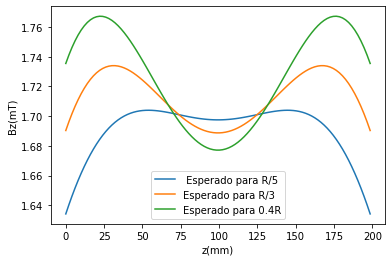

In [10]:
from scipy.integrate import quad
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#caso que r = R/5 cm
r = R/5
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+R/2*1000,abs(x)*1000,label=' Esperado para R/5')

#caso que r = R/3
r = R/3
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+R/2*1000,abs(x)*1000,label='Esperado para R/3')

#caso que r = 0.4R
r = R*0.4
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+R/2*1000,abs(x)*1000,label='Esperado para 0.4R')

plt.legend()

plt.ylabel('Bz(mT)')
plt.xlabel('z(mm)')
plt.savefig('EsperadosBzXz.png')


Posso plotar os dados experimentais que tinha

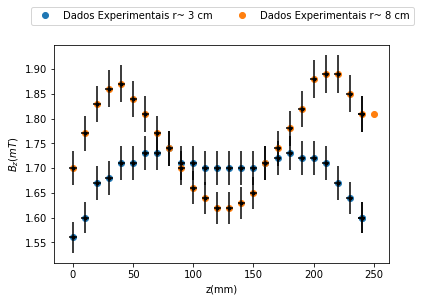

In [11]:
plt.plot(z11*10,B11,'o',label='Dados Experimentais r~ 3 cm')
plt.errorbar(z11*10,B11,yerr=eB11,xerr=ez11*10,fmt='.k')
plt.plot(z2*10,B12,'o',label='Dados Experimentais r~ 8 cm')
plt.errorbar(z12*10,B12,yerr=eB12,xerr=ez12*10,fmt='.k')
#plt.plot(z13*10,B13,'o',label='Dados Experimentais r=0.4R')
#plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.09, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('graphBzXz.png')

Comparando cada um deles

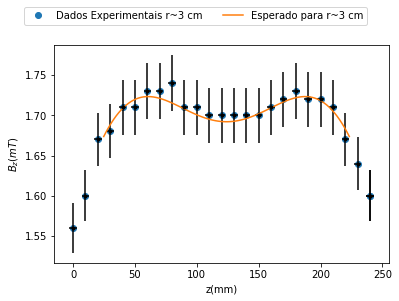

In [12]:
plt.plot(z11*10,B11,'o',label='Dados Experimentais r~3 cm')
plt.errorbar(z11*10,B11,yerr=eB11,xerr=ez11*10,fmt='.k')
#expected
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)
#caso que r = 3 cm
r = 0.06
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+124,abs(x)*1000,'-',label='Esperado para r~3 cm')


plt.legend(bbox_to_anchor =(0.950, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('CompararBz11Xz11.png')

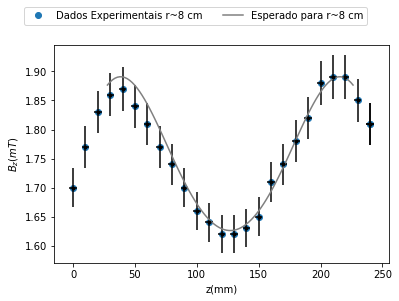

In [13]:

plt.plot(z12*10,B12,'o',label='Dados Experimentais r~8 cm')
plt.errorbar(z12*10,B12,yerr=eB12,xerr=ez12*10,fmt='.k')
#expected
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)
#caso que r = 8 cm
r = 0.105
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+127,abs(x)*1000,'-',color = 'gray',label='Esperado para r~8 cm')


plt.legend(bbox_to_anchor =(0.950, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('CompararBz11Xz11.png')

# Anti Helmontz

Tenho também a configuração de Anti-Helmontz e fizemos para este as mesmas medidas

$\boxed{B_z(z,r=r) = \frac{\mu_0 I R}{4\pi}\int_{0}^{2\pi} \left[\frac{(-r\cos(\theta-\phi)+R)}{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+(z)^2 \right )^{3/2}}-\frac{(-r\cos(\theta-\phi)+R)}{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+(z+R)^2 \right )^{3/2}} \right] d\phi}$, 

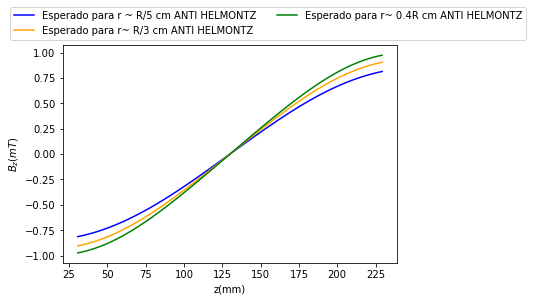

In [14]:
#expected
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#caso que r = 3 cm
r = R/5
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))-1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1
plt.plot(x0*1000+130,x*1000,'-',color = 'blue',label='Esperado para r ~ R/5 cm ANTI HELMONTZ')
    
#caso que r =R/3 cm
r = R/3
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))-1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+130,x*1000,'-',color = 'orange',label='Esperado para r~ R/3 cm ANTI HELMONTZ')


#caso que r = R 0.4 cm
r = 0.4*R
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))-1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+130,x*1000,'-',color = 'green',label='Esperado para r~ 0.4R cm ANTI HELMONTZ')

plt.legend(bbox_to_anchor =(1.4, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('graphBzXzAnti.png')

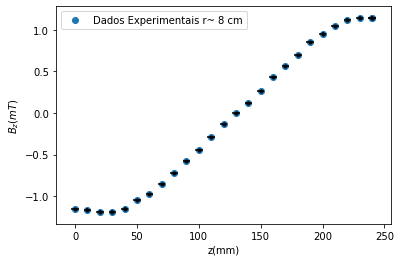

In [15]:
plt.plot(z13*10,B13,'o',label='Dados Experimentais r~ 8 cm')
plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend()
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('graphBzXz.png')

Posso comparar isso com o modelo teórico em que só mudaria sentido de uma das correntes anteriores

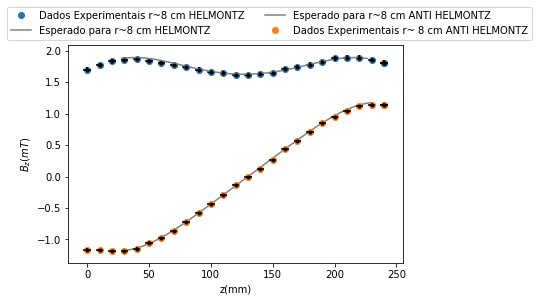

In [16]:
plt.plot(z12*10,B12,'o',label='Dados Experimentais r~8 cm HELMONTZ')
plt.errorbar(z12*10,B12,yerr=eB12,xerr=ez12*10,fmt='.k')
#expected
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)
#caso que r = 8 cm
r = 0.105
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))+1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+127,abs(x)*1000,'-',color = 'gray',label='Esperado para r~8 cm HELMONTZ')

#expected
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)
#caso que r = 8 cm
r = 0.105
u = 0
#l_1+l_2=a=R=>l_2=R-l_1 e l_1-z = R/2 = > l_1=R/2 + z e l_2 = R/2-z
for z in x0:
    def Bz(phi):
        return N*u0*I*R*(-r*np.cos(theta-phi)+R)*(1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2+z)**2)**(3/2))-1/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res, err = quad(Bz,2*np.pi,0)
    x[u]= res
    u+=1

plt.plot(x0*1000+130,x*1000,'-',color = 'gray',label='Esperado para r~8 cm ANTI HELMONTZ')
plt.plot(z13*10,B13,'o',label='Dados Experimentais r~ 8 cm ANTI HELMONTZ')
plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.4, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_z(mT)$')
plt.savefig('graphBzXz.png')

# Agora teria que resolver a radial, mas n consegui..

Agora vamos plottar o $B_r(z,r=a)$ para algumas variações de r, com

$\vec{B} = \frac{\mu_0 I RN}{4\pi} \int_{0}^{2\pi} \frac{l\sin\phi \hat{y} +l\cos\phi \hat{x}   }{\left ( r^2+R^2-2Rr\cos(\theta-\phi)+l^2 \right )^{3/2}} d\phi$, 


$B_r = \sqrt{B_x^2+B_y^2}$


Não está dando certo provavelmente pq tenho que considerar o sin e cos no integral, mas assim essa n seria mais a componente radial. E caso eu pegue situação em que $\theta = \pi/2$, a componente radial seria só $\hat{y}$, assim


$B_r(z,r=r) = \frac{\mu_0 I RN}{4\pi} \int_{0}^{2\pi} \frac{l\sin\phi}{\left ( r^2+R^2-2Rr\cos(\pi/2-\phi)+l^2 \right )^{3/2}} d\phi$, 

que para duas espiras viraria,


$\boxed{B_r = \frac{\mu_0 I RN}{4\pi} \int_{0}^{2\pi} \sin\phi\left [\frac{z+R/2}{\left ( r^2+R^2-2Rr\cos(\pi/2-\phi)+(z+R/2)^2 \right )^{3/2}}  +\frac{z-R/2}{\left ( r^2+R^2-2Rr\cos(\pi/2-\phi)+(z-R/2)^2 \right )^{3/2}} \right ]d\phi }$, 

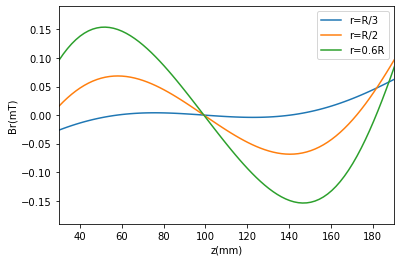

In [17]:
from scipy.integrate import quad
from scipy.signal import find_peaks

#variaveis padrão
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#Caso r =5 cm
r=0.05
u=0
for z in x0:
    #def Bx(phi):
    #    return N*u0*I*R*np.cos(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    #res, err = quad(Bx,2*np.pi,0)
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=R/3')

#Caso r = R/2
r=R/2
u=0
for z in x0:
    #def Bx(phi):
    #    return N*u0*I*R*np.cos(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    #res, err = quad(Bx,2*np.pi,0)
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    
    u+=1
#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=R/2')


#Caso r = 0.6R
r=R*0.6
u=0
for z in x0:
    #def Bx(phi):
    #    return N*u0*I*R*np.cos(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    #res, err = quad(Bx,2*np.pi,0)
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    
    u+=1
#tentar arrumar pl

#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=0.6R')

plt.xlim([30,190])
plt.ylabel('Br(mT)')
plt.xlabel('z(mm)')
plt.legend()
plt.show()

Para caso Anti Helmontz

$\boxed{B_r = \frac{\mu_0 I RN}{4\pi} \int_{0}^{2\pi} \sin\phi\left [\frac{z+R/2}{\left ( r^2+R^2-2Rr\cos(\pi/2-\phi)+(z+R/2)^2 \right )^{3/2}}  -\frac{z-R/2}{\left ( r^2+R^2-2Rr\cos(\pi/2-\phi)+(z-R/2)^2 \right )^{3/2}} \right ]d\phi }$, 



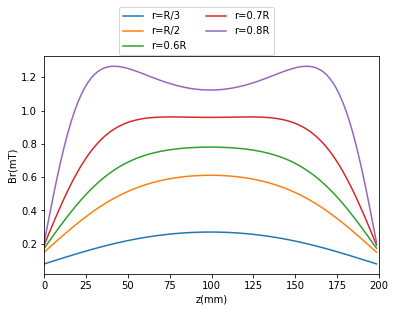

In [18]:
from scipy.integrate import quad

#variaveis padrão
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#Caso r =5 cm
r=0.05
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=R/3')

#Caso r = R/2
r=R/2
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=R/2')


#Caso r = 0.6R
r=R*0.6
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=0.6R')

#Caso r = 0.7R
r=R*0.7
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1

#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=0.7R')

#Caso r = 0.8R
r=R*0.8
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#tentar arrumar pl

#plotar função
plt.plot(x0*1000+R/2*1000,-x*1000,'-',label='r=0.8R')


plt.xlim([0,200])
plt.ylabel('Br(mT)')
plt.xlabel('z(mm)')
plt.legend(bbox_to_anchor =(0.7, 1.25), ncol = 2)
plt.show()

Agora então posso plotar os dados experimentais

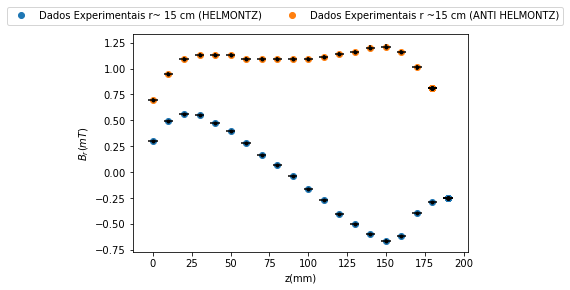

In [19]:
plt.plot(z21*10,B21,'o',label='Dados Experimentais r~ 15 cm (HELMONTZ)')
plt.errorbar(z21*10,B21,yerr=eB21,xerr=ez21*10,fmt='.k')
plt.plot(z22*10,B22,'o',label='Dados Experimentais r ~15 cm (ANTI HELMONTZ)')
plt.errorbar(z22*10,B22,yerr=eB22,xerr=ez22*10,fmt='.k')
#plt.plot(z13*10,B13,'o',label='Dados Experimentais r=0.4R')
#plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.3, 1.15), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_r(mT)$')
plt.savefig('graphBrXz.png')

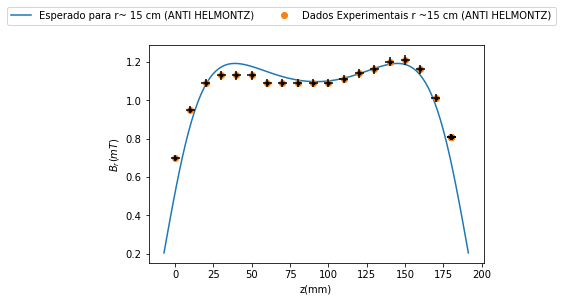

In [20]:
#variaveis padrão
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#Caso r =15 cm
r=0.1553
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+92,-x*1000,'-',label='Esperado para r~ 15 cm (ANTI HELMONTZ)')

plt.plot(z22*10,B22,'o',label='Dados Experimentais r ~15 cm (ANTI HELMONTZ)')
plt.errorbar(z22*10,B22,yerr=eB22,xerr=ez22*10,fmt='.k')
#plt.plot(z13*10,B13,'o',label='Dados Experimentais r=0.4R')
#plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.23, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_r(mT)$')
plt.savefig('graphBrXz.png')

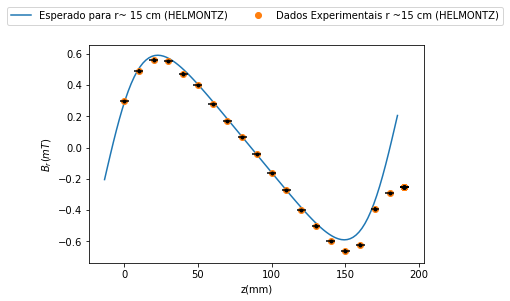

In [21]:
#variaveis padrão
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#Caso r =15 cm
r=0.1553
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+86,-x*1000,'-',label='Esperado para r~ 15 cm (HELMONTZ)')

plt.plot(z21*10,B21,'o',label='Dados Experimentais r ~15 cm (HELMONTZ)')
plt.errorbar(z21*10,B21,yerr=eB21,xerr=ez21*10,fmt='.k')
#plt.plot(z13*10,B13,'o',label='Dados Experimentais r=0.4R')
#plt.errorbar(z13*10,B13,yerr=eB13,xerr=ez13*10,fmt='.k')

plt.legend(bbox_to_anchor =(1.25, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_r(mT)$')
plt.savefig('graphBrXz.png')

Plotar os 2 juntos

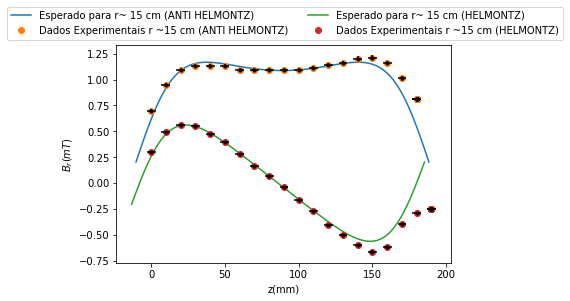

In [22]:
#variaveis padrão
theta = np.pi/2
x=np.ones(100)
x0 = np.linspace(-R/2,R/2,100)

#Caso r =15 cm
r=0.154
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))+ (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+89,-x*1000,'-',label='Esperado para r~ 15 cm (ANTI HELMONTZ)')

plt.plot(z22*10,B22,'o',label='Dados Experimentais r ~15 cm (ANTI HELMONTZ)')
plt.errorbar(z22*10,B22,yerr=eB22,xerr=ez22*10,fmt='.k')

#Caso r =15 cm
r=0.154
u=0
for z in x0:
    def By(phi):
        return N*u0*I*R*np.sin(phi)*((z+R/2)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(z+R/2)**2)**(3/2))- (R/2-z)/(4*np.pi*(r**2+R**2-2*r*R*np.cos(theta-phi)+(R/2-z)**2)**(3/2)))
    res1, err1 = quad(By,2*np.pi,0)
    x[u]= res1
    u+=1
#plotar função
plt.plot(x0*1000+86,-x*1000,'-',label='Esperado para r~ 15 cm (HELMONTZ)')
plt.plot(z21*10,B21,'o',label='Dados Experimentais r ~15 cm (HELMONTZ)')
plt.errorbar(z21*10,B21,yerr=eB21,xerr=ez21*10,fmt='.k')


plt.legend(bbox_to_anchor =(1.35, 1.20), ncol = 2)
plt.xlabel('z(mm)')
plt.ylabel('$B_r(mT)$')
plt.savefig('graphBrXz.png')